In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer
#from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data into a Pandas DataFrame
employees = pd.read_csv("/content/drive/My Drive/Colab Notebooks/employees.csv")

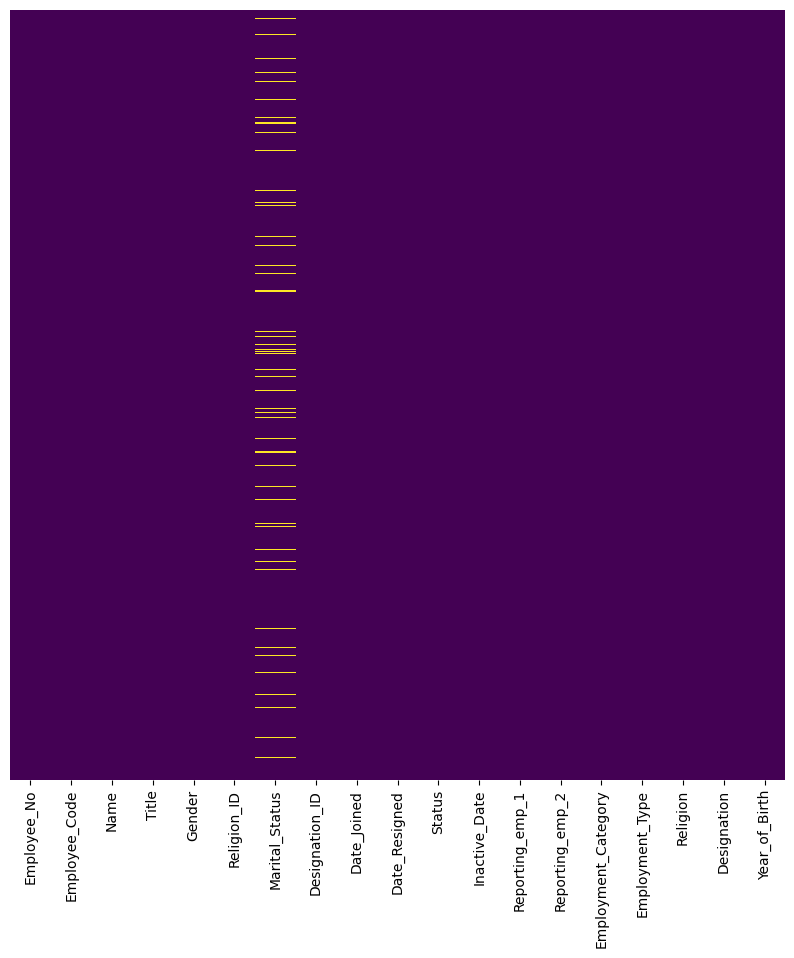

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(employees.sample(n = 995, random_state = 1).isnull(), cmap  = 'viridis', cbar = False, yticklabels = False,
            # xticklabels= False
            )
plt.show()

In [ ]:
employees.head()

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980


In [ ]:
employees.shape

(997, 19)

In [ ]:
numerical_columns = employees.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = employees.select_dtypes(include=['object']).columns

employees_numerical = employees[numerical_columns]
employees_categorical = employees[categorical_columns]

# Print the numerical and categorical data
print("Numerical data:\n", employees_numerical.head())
print("\nCategorical data:\n", employees_categorical.head())

Numerical data:
    Employee_No  Employee_Code  Religion_ID  Designation_ID
0          347              6            1              24
1          348             33            1              24
2          349             53            1              23
3          351             77            4              40
4          352             88            1               7

Categorical data:
                   Name Title  Gender Marital_Status Date_Joined Date_Resigned  \
0    Myrl Bechtelar MD    Mr    Male        Married   12/8/1993            \N   
1         Francis Mraz    Mr    Male        Married   3/14/1995            \N   
2    Mr Emmet Blick Jr    Mr    Male        Married   1/27/1988     6/28/2021   
3  Mr Nelson Braun PhD    Ms  Female        Married   10/1/1999     1/31/2022   
4     Maximillian Hand    Mr    Male        Married   1/26/2001            \N   

     Status Inactive_Date Reporting_emp_1 Reporting_emp_2 Employment_Category  \
0    Active            \N              \N

In [ ]:
print(numerical_columns.shape)
print(categorical_columns.shape)

(4,)
(15,)


In [ ]:
missing_values = employees.isnull().sum()
object_type_missing_values = missing_values[categorical_columns]
print(object_type_missing_values)


Name                    0
Title                   0
Gender                  0
Marital_Status         67
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64


In [ ]:
# Count the number of "\N" values in each object column
missing_values_Null = employees_categorical.apply(lambda x: x == "\\N").sum()

# Print the results
print(missing_values_Null)

Name                     0
Title                    0
Gender                   0
Marital_Status           0
Date_Joined              0
Date_Resigned          273
Status                   0
Inactive_Date          128
Reporting_emp_1        936
Reporting_emp_2        997
Employment_Category      0
Employment_Type          0
Religion                 0
Designation              0
Year_of_Birth            0
dtype: int64


In [ ]:
for column in categorical_columns:
  unique_values = employees[column].unique()
  print(f"Unique values for '{column}'\n: {unique_values}")

Unique values for 'Name'
: ['Myrl Bechtelar MD' 'Francis Mraz' 'Mr Emmet Blick Jr'
 'Mr Nelson Braun PhD' 'Maximillian Hand' 'Zena Nicolas'
 'Coralie Bernhard' 'Josh Roob' 'Ernest Upton' 'Sydney Oberbrunner'
 'Angeline Yundt' 'Prof Karlie Bauch III' 'Leonel Romaguera'
 'Sidney Macejkovic' 'Prof Jerod Pfeffer' 'Ignatius Volkman DDS'
 'Doyle Hettinger' 'Izaiah Berge' 'Prof Arden Jacobs III'
 'Shaylee Schroeder III' 'Raymond Bogan' 'Kayden Rice' 'Macey Simonis'
 'Jayde Witting' 'Sylvan Gislason' 'Dr Kennedy Ryan MD'
 'Tillman Greenfelder' 'Hanna Wyman' 'Tessie Fadel' 'Orval Hessel'
 'Katelin Thompson' 'Savanna Spinka' 'Carley Bogisich' 'Jaquelin Block'
 'Garland Feeney' 'Elody Waelchi' 'Nola Grant' 'Macie Kuvalis'
 'Julie Osinski' 'Jody Stokes' 'Scottie Ratke' 'Braulio Pagac IV'
 'Jon Kuhn' 'Ally Nikolaus' 'Jesus Dietrich Sr' 'Addie Purdy'
 'Noelia Roberts DDS' 'Isabella Brakus' 'Bo Schaefer I' 'Ms Jany Lemke'
 'Dr Kieran Bradtke IV' 'Marcos Kemmer MD' 'Burley Willms'
 'Kaley Ankunding MD

In [ ]:
# ['Title', 'Gender', 'Marital_Status', 'Status', 'Employment_Category', 'Employment_Type', 'Religion'] need to be encoded.
# These columns does not have any null values or missing values except for 'Marutal_Status'.
# So the 'Marital_Status needs to be imputed in order to encode the label'

In [ ]:
# Function to encode "Gender" label such that male would be 0 and female would be 1
def encode_Gender(Gender):
  if Gender == 'Male':
    return 0
  elif Gender == 'Female':
    return 1
  else:
    raise ValueError('Invalid Gender value')

# Function to encode "Title" label such that 'Mr' = 0, 'Ms' = 2, 'Miss' = 1
def encode_Title(Title):
  if Title == 'Mr':
    return 0
  elif Title == 'Miss':
    return 1
  elif Title == 'Ms':
    return 2
  else:
    raise ValueError('Invalid Title value')

# Function to encode 'Status' label such that 'Inactive' = 0 and 'Active' = 1
def encode_Status(Status):
  if Status == 'Inactive':
    return 0
  elif Status == 'Active':
    return 1
  else:
    raise ValueError('Invalid Status')

# Function to encode 'Employment_Category' such that 'Labour' = 0, 'Staff' = 1, 'Management' = 2.
def encode_Employment_Category(Employment_Category):
  if Employment_Category == 'Labour':
    return 0
  elif Employment_Category == 'Staff':
    return 1
  elif Employment_Category == 'Management':
    return 2
  else:
    raise ValueError('Invalid Employment Category')

# Function to encode "Employment_Type" label such that 'Permanant' would be 1 and 'Contarct Basis' would be 0
def encode_Employment_Type(Employment_Type):
  if Employment_Type == 'Contarct Basis':
    return 0
  elif Employment_Type == 'Permanant':
    return 1
  else:
    raise ValueError('Invalid Employment Type')

In [ ]:
employees['Gender'] = employees['Gender'].apply(encode_Gender)
employees['Title'] = employees['Title'].apply(encode_Title)
employees['Status'] = employees['Status'].apply(encode_Status)
employees['Employment_Category'] = employees['Employment_Category'].apply(encode_Employment_Category)
employees['Employment_Type'] = employees['Employment_Type'].apply(encode_Employment_Type)

In [ ]:
numerical_columns = employees.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = employees.select_dtypes(include=['object']).columns

employees_numerical = employees[numerical_columns]
employees_categorical = employees[categorical_columns]

# Print the numerical and categorical data
print("\nCategorical data:\n", employees_categorical.head())


Categorical data:
                   Name Marital_Status Date_Joined Date_Resigned Inactive_Date  \
0    Myrl Bechtelar MD        Married   12/8/1993            \N            \N   
1         Francis Mraz        Married   3/14/1995            \N            \N   
2    Mr Emmet Blick Jr        Married   1/27/1988     6/28/2021     6/28/2021   
3  Mr Nelson Braun PhD        Married   10/1/1999     1/31/2022     1/31/2022   
4     Maximillian Hand        Married   1/26/2001            \N            \N   

  Reporting_emp_1 Reporting_emp_2  Religion         Designation Year_of_Birth  
0              \N              \N  Buddhist              Driver          1965  
1              \N              \N  Buddhist              Driver          1973  
2              \N              \N  Buddhist       Account Clerk          1974  
3              \N              \N  Catholic  Purchasing Officer          1974  
4              \N              \N  Buddhist        Store Keeper          1980  


In [ ]:
employees_numerical.head()

,Employee_No,Employee_Code,Title,Gender,Religion_ID,Designation_ID,Status,Employment_Category,Employment_Type
0,347,6,0,0,1,24,1,1,1
1,348,33,0,0,1,24,1,1,1
2,349,53,0,0,1,23,0,1,1
3,351,77,2,1,4,40,0,1,1
4,352,88,0,0,1,7,1,1,1


In [ ]:
employees.isnull().sum()

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64

In [ ]:
missing_values_Null = employees_numerical.apply(lambda x: x == "\\N").sum()

# Print the results
print(missing_values_Null)

Employee_No            0
Employee_Code          0
Title                  0
Gender                 0
Religion_ID            0
Designation_ID         0
Status                 0
Employment_Category    0
Employment_Type        0
dtype: int64


In [ ]:

import pandas as pd
employees['Date_Joined'] = pd.to_datetime(employees['Date_Joined'])


In [ ]:
# extract day, month , year, quarter as different features from employees["Date_Joined"]

employees['Date_Joined_Day'] = employees['Date_Joined'].dt.day
employees['Date_Joined_Month'] = employees['Date_Joined'].dt.month
employees['Date_Joined_Year'] = employees['Date_Joined'].dt.year
employees['Date_Joined_Quarter']=employees["Date_Joined"].dt.quarter


In [ ]:
employees.head(100)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Date_Joined_Day,Date_Joined_Month,Date_Joined_Year,Date_Joined_Quarter
0,347,6,Myrl Bechtelar MD,0,0,1,Married,24,1993-12-08,\N,...,\N,1,1,Buddhist,Driver,1965,8,12,1993,4
1,348,33,Francis Mraz,0,0,1,Married,24,1995-03-14,\N,...,\N,1,1,Buddhist,Driver,1973,14,3,1995,1
2,349,53,Mr Emmet Blick Jr,0,0,1,Married,23,1988-01-27,6/28/2021,...,\N,1,1,Buddhist,Account Clerk,1974,27,1,1988,1
3,351,77,Mr Nelson Braun PhD,2,1,4,Married,40,1999-10-01,1/31/2022,...,\N,1,1,Catholic,Purchasing Officer,1974,1,10,1999,4
4,352,88,Maximillian Hand,0,0,1,Married,7,2001-01-26,\N,...,\N,1,1,Buddhist,Store Keeper,1980,26,1,2001,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,508,3533,Dr Bernice Feil,0,0,1,NaN,24,2017-09-09,0000-00-00,...,\N,1,0,Buddhist,Driver,'0000',9,9,2017,3
96,509,3536,Ewell Koch,2,1,3,Married,8,2017-09-15,\N,...,\N,1,0,Hindu,Quantity Surveyor,1993,15,9,2017,3
97,510,3537,Cristobal Wilkinson,0,0,3,Single,8,2017-09-15,2/10/2022,...,\N,1,0,Hindu,Quantity Surveyor,1991,15,9,2017,3
98,512,3545,Mason Ryan,0,0,1,Single,24,2017-10-02,0000-00-00,...,\N,1,0,Buddhist,Driver,1994,2,10,2017,4


In [ ]:
employees['Date_Joined'].isnull().sum()

0

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Employee_No          997 non-null    int64         
 1   Employee_Code        997 non-null    int64         
 2   Name                 997 non-null    object        
 3   Title                997 non-null    int64         
 4   Gender               997 non-null    int64         
 5   Religion_ID          997 non-null    int64         
 6   Marital_Status       930 non-null    object        
 7   Designation_ID       997 non-null    int64         
 8   Date_Joined          997 non-null    datetime64[ns]
 9   Date_Resigned        997 non-null    object        
 10  Status               997 non-null    int64         
 11  Inactive_Date        997 non-null    object        
 12  Reporting_emp_1      997 non-null    object        
 13  Reporting_emp_2      997 non-null  

In [ ]:
employees.dtypes

Employee_No                     int64
Employee_Code                   int64
Name                           object
Title                           int64
Gender                          int64
Religion_ID                     int64
Marital_Status                 object
Designation_ID                  int64
Date_Joined            datetime64[ns]
Date_Resigned                  object
Status                          int64
Inactive_Date                  object
Reporting_emp_1                object
Reporting_emp_2                object
Employment_Category             int64
Employment_Type                 int64
Religion                       object
Designation                    object
Year_of_Birth                  object
Date_Joined_Day                 int32
Date_Joined_Month               int32
Date_Joined_Year                int32
Date_Joined_Quarter             int32
dtype: object

In [ ]:
# Convert 'Year_of_Birth' to datetime
employees['Year_of_Birth'] = pd.to_datetime(employees['Year_of_Birth'], format='%Y', errors='coerce').dt.year

In [ ]:
employees['Year_of_Birth'].isnull().sum()

103

In [ ]:
mode_value =employees["Year_of_Birth"].mode()[0]

# Impute missing values with the mode
employees["Year_of_Birth"].fillna(mode_value, inplace=True)

In [ ]:
employees['Year_of_Birth'].isnull().sum()

0

In [ ]:
# Convert 'Date_Resigned' to datetime, handling missing values
employees['Date_Resigned'] = pd.to_datetime(employees['Date_Resigned'],errors='coerce')

<ipython-input-30-a690ad9a737c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employees['Date_Resigned'] = pd.to_datetime(employees['Date_Resigned'],errors='coerce')


In [ ]:
employees['Date_Resigned']

0            NaT
1            NaT
2     2021-06-28
3     2022-01-31
4            NaT
         ...    
992   2022-12-22
993          NaT
994          NaT
995          NaT
996          NaT
Name: Date_Resigned, Length: 997, dtype: datetime64[ns]

In [ ]:
employees['Date_Resigned'].nunique()

254

In [ ]:
# Forward fill missing dates
mode_value =employees["Date_Resigned"].mode()[0]

# Impute missing values with the mode
employees["Date_Resigned"].fillna(mode_value, inplace=True)


In [ ]:
employees['Date_Resigned'].isnull().sum()

0

In [ ]:
employees['Date_Resigned'].unique()

<DatetimeArray>
['2021-10-31 00:00:00', '2021-06-28 00:00:00', '2022-01-31 00:00:00',
 '2021-05-05 00:00:00', '2021-05-23 00:00:00', '2021-04-30 00:00:00',
 '2021-12-17 00:00:00', '2021-08-31 00:00:00', '2021-05-30 00:00:00',
 '2021-07-25 00:00:00',
 ...
 '2022-05-28 00:00:00', '2022-03-03 00:00:00', '2022-03-10 00:00:00',
 '2022-03-08 00:00:00', '2022-04-04 00:00:00', '2022-09-05 00:00:00',
 '2022-08-27 00:00:00', '2022-09-19 00:00:00', '2022-11-04 00:00:00',
 '2022-12-22 00:00:00']
Length: 254, dtype: datetime64[ns]

In [ ]:
employees['Date_Resigned_Day'] = employees['Date_Resigned'].dt.day
employees['Date_Resigned_Month'] = employees['Date_Resigned'].dt.month
employees['Date_Resigned_Year'] = employees['Date_Resigned'].dt.year
employees['Date_Resigned_Quarter']=employees["Date_Resigned"].dt.quarter
employees['Date_Resigned_Week']=employees['Date_Resigned'].dt.isocalendar().week

In [ ]:
employees.head()

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Year_of_Birth,Date_Joined_Day,Date_Joined_Month,Date_Joined_Year,Date_Joined_Quarter,Date_Resigned_Day,Date_Resigned_Month,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week
0,347,6,Myrl Bechtelar MD,0,0,1,Married,24,1993-12-08,2021-10-31,...,1965.0,8,12,1993,4,31,10,2021,4,43
1,348,33,Francis Mraz,0,0,1,Married,24,1995-03-14,2021-10-31,...,1973.0,14,3,1995,1,31,10,2021,4,43
2,349,53,Mr Emmet Blick Jr,0,0,1,Married,23,1988-01-27,2021-06-28,...,1974.0,27,1,1988,1,28,6,2021,2,26
3,351,77,Mr Nelson Braun PhD,2,1,4,Married,40,1999-10-01,2022-01-31,...,1974.0,1,10,1999,4,31,1,2022,1,5
4,352,88,Maximillian Hand,0,0,1,Married,7,2001-01-26,2021-10-31,...,1980.0,26,1,2001,1,31,10,2021,4,43


In [ ]:
employees['Marital_Status'].unique()

array(['Married', 'Single', nan], dtype=object)

In [ ]:
# prompt: in Marital_Status replace empty records as Not_Given

employees['Marital_Status'].fillna('Not_Given', inplace=True)


In [ ]:
employees['Marital_Status'].unique()

array(['Married', 'Single', 'Not_Given'], dtype=object)

In [ ]:
#use label encoder to encode the feature employees['Marital_Status']

# Encode the 'Marital_Status' column using LabelEncoder
label_encoder = LabelEncoder()
employees['Marital_Status'] = label_encoder.fit_transform(employees['Marital_Status'])


In [ ]:
employees['Marital_Status'].unique()

array([0, 2, 1])

In [ ]:


print(dict(enumerate(label_encoder.classes_)))


{0: 'Married', 1: 'Not_Given', 2: 'Single'}


In [ ]:
employees.head()

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Year_of_Birth,Date_Joined_Day,Date_Joined_Month,Date_Joined_Year,Date_Joined_Quarter,Date_Resigned_Day,Date_Resigned_Month,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week
0,347,6,Myrl Bechtelar MD,0,0,1,0,24,1993-12-08,2021-10-31,...,1965.0,8,12,1993,4,31,10,2021,4,43
1,348,33,Francis Mraz,0,0,1,0,24,1995-03-14,2021-10-31,...,1973.0,14,3,1995,1,31,10,2021,4,43
2,349,53,Mr Emmet Blick Jr,0,0,1,0,23,1988-01-27,2021-06-28,...,1974.0,27,1,1988,1,28,6,2021,2,26
3,351,77,Mr Nelson Braun PhD,2,1,4,0,40,1999-10-01,2022-01-31,...,1974.0,1,10,1999,4,31,1,2022,1,5
4,352,88,Maximillian Hand,0,0,1,0,7,2001-01-26,2021-10-31,...,1980.0,26,1,2001,1,31,10,2021,4,43


In [ ]:
employees['Designation_ID'].unique()

array([ 24,  23,  40,   7,  22, 126,  41,  42,  43,  44,  45,  46,  35,
        48,  33,  27,   8,  49,  37,   6,  67,  36,  52,  54,  57,  38,
        58,  62,  63,  64,  59, 113,  31,  30,   1,  70,  69, 124,  29,
        65,  72, 107,  88, 111,  89,  97, 101, 175,  17,  78, 193, 127,
       110,  79,  84,  98, 104, 143, 157,   9, 108, 102,  39,  80,  73,
        55,  99, 122,  86, 125,  51, 135, 123, 134,   2, 120,  53, 128,
        32, 116,  68, 129,  71, 132, 133, 138, 140,  93, 177, 144, 146,
       147, 176,  95, 149, 153,  66, 162, 163, 161,   4,  90, 167, 139,
       112, 158,  25, 170, 168,  56,  83, 173, 195, 178, 152, 180, 181,
       182, 184, 169, 186, 187, 189,  26, 190, 191, 192, 198, 201])

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Employee_No            997 non-null    int64         
 1   Employee_Code          997 non-null    int64         
 2   Name                   997 non-null    object        
 3   Title                  997 non-null    int64         
 4   Gender                 997 non-null    int64         
 5   Religion_ID            997 non-null    int64         
 6   Marital_Status         997 non-null    int64         
 7   Designation_ID         997 non-null    int64         
 8   Date_Joined            997 non-null    datetime64[ns]
 9   Date_Resigned          997 non-null    datetime64[ns]
 10  Status                 997 non-null    int64         
 11  Inactive_Date          997 non-null    object        
 12  Reporting_emp_1        997 non-null    object        
 13  Repor

In [ ]:
employees['Employee_Code'].nunique()

997

In [ ]:
# Drop Employee_No, Employee_Code, Name, Designation, Reporting_emp_1, Religion

employees.drop(columns=['Employee_No', 'Employee_Code', 'Name', 'Designation', 'Reporting_emp_2', 'Religion'], axis=1, inplace=True)


In [ ]:
employees.head()

,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,...,Year_of_Birth,Date_Joined_Day,Date_Joined_Month,Date_Joined_Year,Date_Joined_Quarter,Date_Resigned_Day,Date_Resigned_Month,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week
0,0,0,1,0,24,1993-12-08,2021-10-31,1,\N,\N,...,1965.0,8,12,1993,4,31,10,2021,4,43
1,0,0,1,0,24,1995-03-14,2021-10-31,1,\N,\N,...,1973.0,14,3,1995,1,31,10,2021,4,43
2,0,0,1,0,23,1988-01-27,2021-06-28,0,6/28/2021,\N,...,1974.0,27,1,1988,1,28,6,2021,2,26
3,2,1,4,0,40,1999-10-01,2022-01-31,0,1/31/2022,\N,...,1974.0,1,10,1999,4,31,1,2022,1,5
4,0,0,1,0,7,2001-01-26,2021-10-31,1,\N,\N,...,1980.0,26,1,2001,1,31,10,2021,4,43


In [ ]:
employees['Inactive_Date'] = pd.to_datetime(employees['Inactive_Date'],errors='coerce')

<ipython-input-50-994b4ceb09c8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  employees['Inactive_Date'] = pd.to_datetime(employees['Inactive_Date'],errors='coerce')


In [ ]:
employees['Inactive_Date'].unique()

<DatetimeArray>
[                'NaT', '2021-06-28 00:00:00', '2022-01-31 00:00:00',
 '2020-08-31 00:00:00', '2021-05-05 00:00:00', '2021-05-23 00:00:00',
 '2020-09-10 00:00:00', '2020-05-21 00:00:00', '2021-04-30 00:00:00',
 '2020-09-27 00:00:00',
 ...
 '2022-05-28 00:00:00', '2022-03-03 00:00:00', '2022-03-10 00:00:00',
 '2022-03-08 00:00:00', '2022-04-04 00:00:00', '2022-09-05 00:00:00',
 '2022-08-26 00:00:00', '2022-09-19 00:00:00', '2022-11-04 00:00:00',
 '2022-12-22 00:00:00']
Length: 351, dtype: datetime64[ns]

In [ ]:
employees['Inactive_Date'].isnull().sum()

233

In [ ]:

mode_value =employees["Inactive_Date"].mode()[0]

# Impute missing values with the mode
employees["Inactive_Date"].fillna(mode_value, inplace=True)

In [ ]:
employees['Inactive_Date_Day'] = employees['Inactive_Date'].dt.day
employees['Inactive_Date_Month'] = employees['Inactive_Date'].dt.month
employees['Inactive_Date_Year'] = employees['Inactive_Date'].dt.year
employees['Inactive_Date_Quarter']=employees["Inactive_Date"].dt.quarter
employees['Inactive_Date_Week']=employees['Inactive_Date'].dt.isocalendar().week
employees['Inactive_Date_IsWeekend'] = (employees['Inactive_Date'].dt.dayofweek).isin([5,6])

In [ ]:
employees.head(100)

,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,...,Date_Resigned_Month,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week,Inactive_Date_Day,Inactive_Date_Month,Inactive_Date_Year,Inactive_Date_Quarter,Inactive_Date_Week,Inactive_Date_IsWeekend
0,0,0,1,0,24,1993-12-08,2021-10-31,1,2020-12-31,\N,...,10,2021,4,43,31,12,2020,4,53,False
1,0,0,1,0,24,1995-03-14,2021-10-31,1,2020-12-31,\N,...,10,2021,4,43,31,12,2020,4,53,False
2,0,0,1,0,23,1988-01-27,2021-06-28,0,2021-06-28,\N,...,6,2021,2,26,28,6,2021,2,26,False
3,2,1,4,0,40,1999-10-01,2022-01-31,0,2022-01-31,\N,...,1,2022,1,5,31,1,2022,1,5,False
4,0,0,1,0,7,2001-01-26,2021-10-31,1,2020-12-31,\N,...,10,2021,4,43,31,12,2020,4,53,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,1,1,24,2017-09-09,2021-10-31,0,2020-05-30,\N,...,10,2021,4,43,30,5,2020,2,22,True
96,2,1,3,0,8,2017-09-15,2021-10-31,0,2020-03-13,\N,...,10,2021,4,43,13,3,2020,1,11,False
97,0,0,3,2,8,2017-09-15,2022-02-10,0,2022-02-10,\N,...,2,2022,1,6,10,2,2022,1,6,False
98,0,0,1,2,24,2017-10-02,2021-10-31,0,2020-06-12,\N,...,10,2021,4,43,12,6,2020,2,24,False


In [ ]:
employees['Inactive_Date_IsWeekend'].value_counts()

Inactive_Date_IsWeekend
False    790
True     207
Name: count, dtype: int64

In [ ]:
# prompt: in Reporting_emp_1 replace '\N as a null value

import numpy as np
employees['Reporting_emp_1'] = employees['Reporting_emp_1'].replace('\\N', np.nan)


In [ ]:
employees['Reporting_emp_1'].value_counts()

Reporting_emp_1
1964    9
2709    7
673     6
1333    6
2631    4
1538    4
624     4
945     3
545     3
1834    2
1109    1
2064    1
2017    1
1739    1
1158    1
605     1
716     1
651     1
649     1
625     1
569     1
393     1
2124    1
Name: count, dtype: int64

In [ ]:
employees['Reporting_emp_1'].isnull().sum()

936

In [ ]:
# employees['Reporting_emp_1'] drop this feature

employees.drop('Reporting_emp_1', axis=1, inplace=True)


In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Title                    997 non-null    int64         
 1   Gender                   997 non-null    int64         
 2   Religion_ID              997 non-null    int64         
 3   Marital_Status           997 non-null    int64         
 4   Designation_ID           997 non-null    int64         
 5   Date_Joined              997 non-null    datetime64[ns]
 6   Date_Resigned            997 non-null    datetime64[ns]
 7   Status                   997 non-null    int64         
 8   Inactive_Date            997 non-null    datetime64[ns]
 9   Employment_Category      997 non-null    int64         
 10  Employment_Type          997 non-null    int64         
 11  Year_of_Birth            997 non-null    float64       
 12  Date_Joined_Day          997 non-nul

In [ ]:
correlate_columns = ['Gender','Religion_ID','Marital_Status','Designation_ID','Status','Employment_Category','Employment_Type',
                     'Year_of_Birth','Date_Joined_Day','Date_Joined_Month','Date_Joined_Year','Date_Joined_Quarter','Date_Resigned_Day',
                     'Date_Resigned_Month','Date_Resigned_Year','Date_Resigned_Quarter','Date_Resigned_Week','Inactive_Date_Day',
                     'Inactive_Date_Month','Inactive_Date_Year','Inactive_Date_Quarter','Inactive_Date_Week','Inactive_Date_IsWeekend']

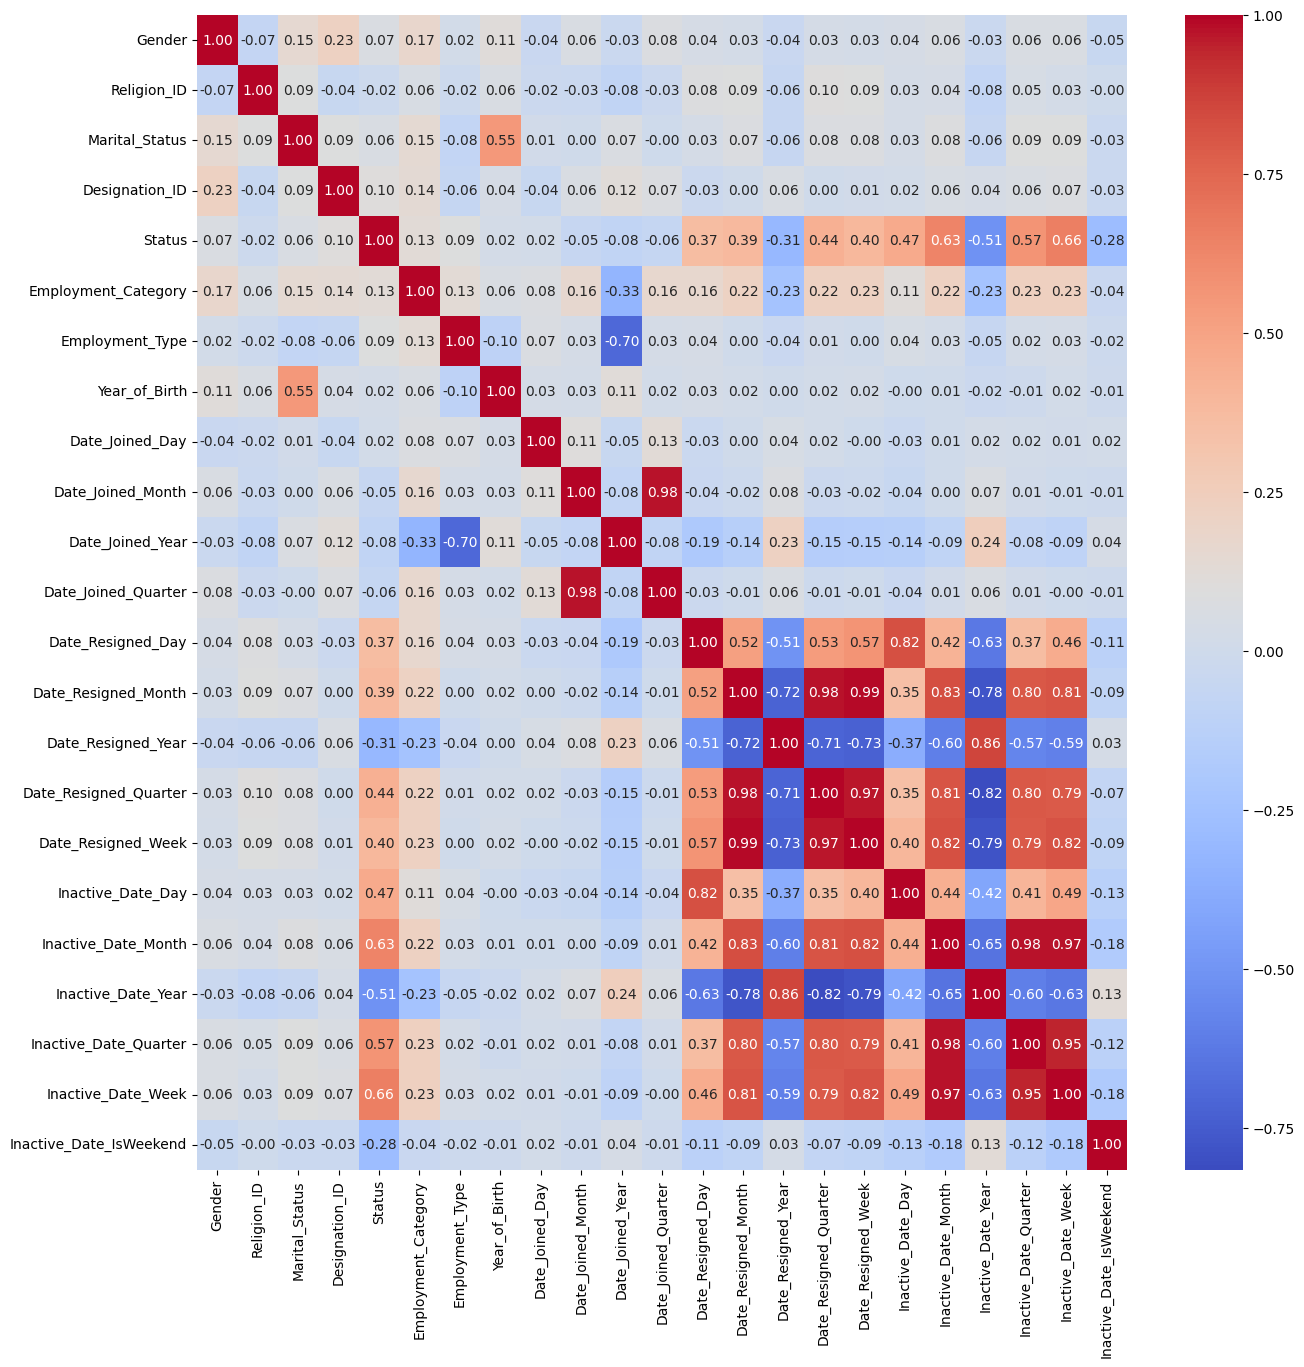

In [ ]:
# Create the correlation matrix
corr_matrix = employees[correlate_columns].corr()
plt.figure(figsize=(15,15))
# Generate a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Display the heatmap
plt.show()

In [ ]:
# Due to correlation - ['Date_Resigned_Month','Inactive_Date_Month', 'Inactive_Date_Quarter','Date_Joined_Quarter'] need to be removed

In [ ]:
employees.drop(labels = ['Date_Resigned_Month','Inactive_Date_Month', 'Inactive_Date_Quarter','Date_Joined_Quarter'],axis=1, inplace=True)

In [ ]:
employees.head()

,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Employment_Category,...,Date_Joined_Month,Date_Joined_Year,Date_Resigned_Day,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week,Inactive_Date_Day,Inactive_Date_Year,Inactive_Date_Week,Inactive_Date_IsWeekend
0,0,0,1,0,24,1993-12-08,2021-10-31,1,2020-12-31,1,...,12,1993,31,2021,4,43,31,2020,53,False
1,0,0,1,0,24,1995-03-14,2021-10-31,1,2020-12-31,1,...,3,1995,31,2021,4,43,31,2020,53,False
2,0,0,1,0,23,1988-01-27,2021-06-28,0,2021-06-28,1,...,1,1988,28,2021,2,26,28,2021,26,False
3,2,1,4,0,40,1999-10-01,2022-01-31,0,2022-01-31,1,...,10,1999,31,2022,1,5,31,2022,5,False
4,0,0,1,0,7,2001-01-26,2021-10-31,1,2020-12-31,1,...,1,2001,31,2021,4,43,31,2020,53,False


In [ ]:
employees.columns


Index(['Title', 'Gender', 'Religion_ID', 'Marital_Status', 'Designation_ID',
       'Date_Joined', 'Date_Resigned', 'Status', 'Inactive_Date',
       'Employment_Category', 'Employment_Type', 'Year_of_Birth',
       'Date_Joined_Day', 'Date_Joined_Month', 'Date_Joined_Year',
       'Date_Resigned_Day', 'Date_Resigned_Year', 'Date_Resigned_Quarter',
       'Date_Resigned_Week', 'Inactive_Date_Day', 'Inactive_Date_Year',
       'Inactive_Date_Week', 'Inactive_Date_IsWeekend'],
      dtype='object')

In [ ]:
#employees.to_csv('employee_preprocess_12.csv', index=False)

In [ ]:
# what is the  count of unique values of each of  the variable s in the employee data set

# Get the unique values for each variable in the employees DataFrame
unique_values = {}
for column in employees.columns:
  unique_values[column] = employees[column].unique()

# Print the count of unique values for each variable
for column, values in unique_values.items():
  print(f"Variable: {column}, Unique Values: {len(values)}")


Variable: Title, Unique Values: 3
Variable: Gender, Unique Values: 2
Variable: Religion_ID, Unique Values: 4
Variable: Marital_Status, Unique Values: 3
Variable: Designation_ID, Unique Values: 129
Variable: Date_Joined, Unique Values: 549
Variable: Date_Resigned, Unique Values: 254
Variable: Status, Unique Values: 2
Variable: Inactive_Date, Unique Values: 350
Variable: Employment_Category, Unique Values: 3
Variable: Employment_Type, Unique Values: 2
Variable: Year_of_Birth, Unique Values: 59
Variable: Date_Joined_Day, Unique Values: 31
Variable: Date_Joined_Month, Unique Values: 12
Variable: Date_Joined_Year, Unique Values: 25
Variable: Date_Resigned_Day, Unique Values: 31
Variable: Date_Resigned_Year, Unique Values: 3
Variable: Date_Resigned_Quarter, Unique Values: 4
Variable: Date_Resigned_Week, Unique Values: 53
Variable: Inactive_Date_Day, Unique Values: 31
Variable: Inactive_Date_Year, Unique Values: 4
Variable: Inactive_Date_Week, Unique Values: 53
Variable: Inactive_Date_IsWeeke

##**Insights**

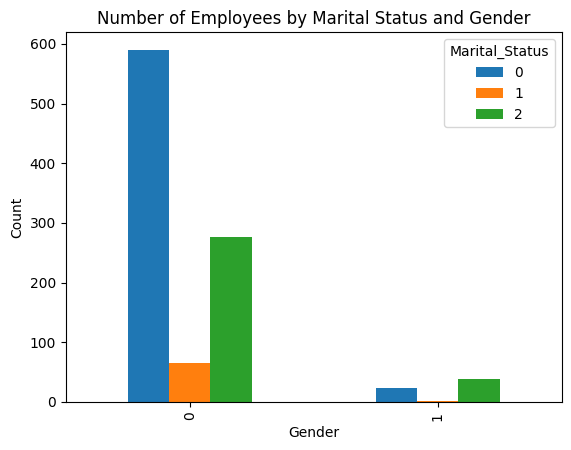

In [ ]:
import matplotlib.pyplot as plt

# Create a bar chart showing the number of employees with each marital status, grouped by gender
employees.groupby(['Gender', 'Marital_Status']).size().unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Employees by Marital Statusr')

# Show the plot
plt.show()



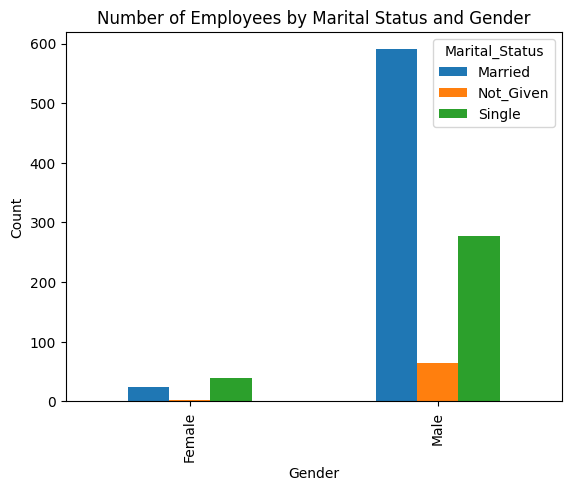

In [ ]:
# in the above graph chamge the labels as Marital status {0: 'Married', 1: 'Not_Given', 2: 'Single'} and Gender {male:0, feamle:1}

import matplotlib.pyplot as plt
# Create a dictionary to map the numerical values of Marital_Status to their corresponding string labels
marital_status_mapping = {
    0: 'Married',
    1: 'Not_Given',
    2: 'Single'
}

# Create a dictionary to map the numerical values of Gender to their corresponding string labels
gender_mapping = {
    0: 'Male',
    1: 'Female'
}

# Use the mapping dictionaries to replace the numerical values in the employees DataFrame
employees['Marital_Status'] = employees['Marital_Status'].map(marital_status_mapping)
employees['Gender'] = employees['Gender'].map(gender_mapping)

# Create a bar chart showing the number of employees with each marital status, grouped by gender
employees.groupby(['Gender', 'Marital_Status']).size().unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Employees by Marital Status and Gender')

# Show the plot
plt.show()


In [ ]:
#create a new variable as service_time as Date_resigned - Date_Joined

import pandas as pd
employees['Date_Resigned'] = pd.to_datetime(employees['Date_Resigned'])
employees['Date_Joined'] = pd.to_datetime(employees['Date_Joined'])
employees['service_time'] = employees['Date_Resigned'] - employees['Date_Joined']
employees.head()


,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Employment_Category,...,Date_Joined_Year,Date_Resigned_Day,Date_Resigned_Year,Date_Resigned_Quarter,Date_Resigned_Week,Inactive_Date_Day,Inactive_Date_Year,Inactive_Date_Week,Inactive_Date_IsWeekend,service_time
0,0,Male,1,Married,24,1993-12-08,2021-10-31,1,2020-12-31,1,...,1993,31,2021,4,43,31,2020,53,False,10189 days
1,0,Male,1,Married,24,1995-03-14,2021-10-31,1,2020-12-31,1,...,1995,31,2021,4,43,31,2020,53,False,9728 days
2,0,Male,1,Married,23,1988-01-27,2021-06-28,0,2021-06-28,1,...,1988,28,2021,2,26,28,2021,26,False,12206 days
3,2,Female,4,Married,40,1999-10-01,2022-01-31,0,2022-01-31,1,...,1999,31,2022,1,5,31,2022,5,False,8158 days
4,0,Male,1,Married,7,2001-01-26,2021-10-31,1,2020-12-31,1,...,2001,31,2021,4,43,31,2020,53,False,7583 days


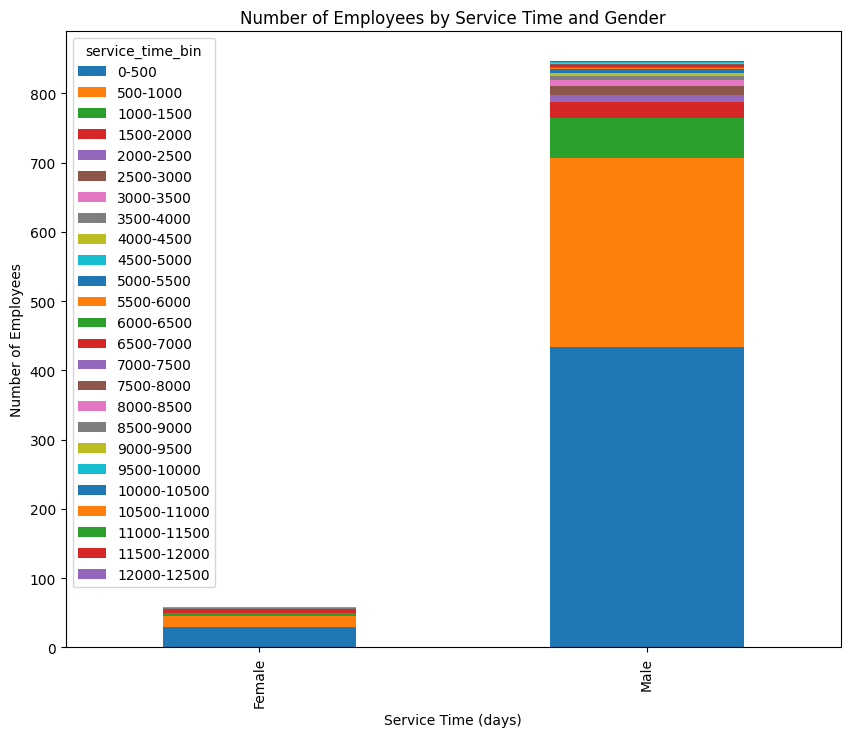

In [ ]:
# make intervals of the serivice_time of size 500 and drow column chart for each interval for males and females, for that first convert service_time to an integer,

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
employees['service_time'] = employees['service_time'].astype('int64')

# Create bins and labels for the histogram
bins = np.arange(0, employees['service_time'].max() + 500, 500)
labels = [(str(bins[i]) + '-' + str(bins[i+1])) for i in range(len(bins)-1)]

# Create a new column with the bin labels for each employee
employees['service_time_bin'] = pd.cut(employees['service_time'], bins=bins, labels=labels)

# Group the employees by gender and service time bin and count the number of employees
grouped = employees.groupby(['Gender', 'service_time_bin']).size().unstack()

# Create a bar chart of the grouped data
grouped.plot(kind='bar', stacked=True,figsize=(10,8))

# Add labels and title
plt.xlabel('Service Time (days)')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Service Time and Gender')

# Show the plot
plt.show()


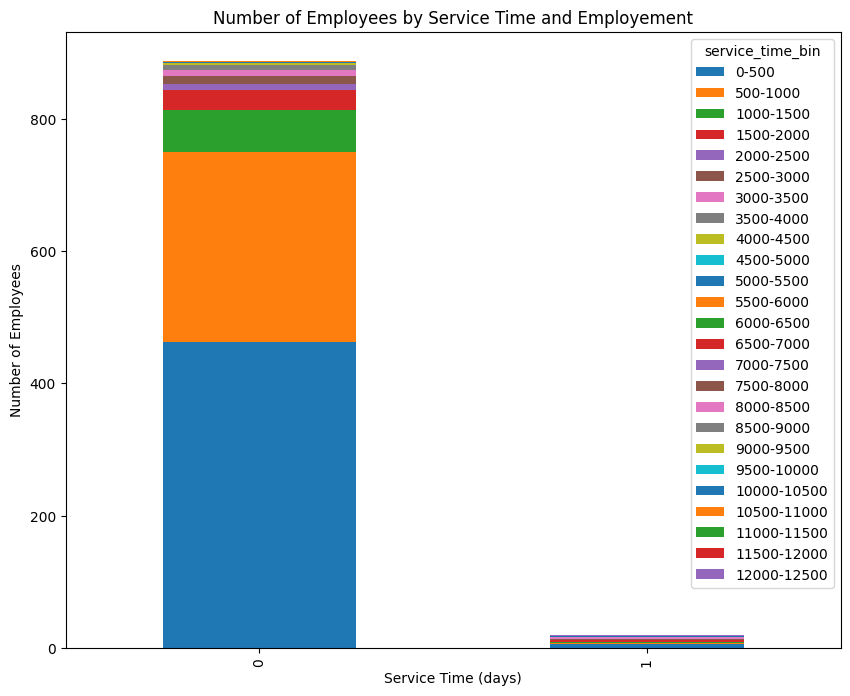

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
employees['service_time'] = employees['service_time'].astype('int64')

# Create bins and labels for the histogram
bins = np.arange(0, employees['service_time'].max() + 500, 500)
labels = [(str(bins[i]) + '-' + str(bins[i+1])) for i in range(len(bins)-1)]

# Create a new column with the bin labels for each employee
employees['service_time_bin'] = pd.cut(employees['service_time'], bins=bins, labels=labels)

# Group the employees by Employement and service time bin and count the number of employees
grouped = employees.groupby(['Employment_Type', 'service_time_bin']).size().unstack()

# Create a bar chart of the grouped data
grouped.plot(kind='bar', stacked=True,figsize=(10,8))

# Add labels and title
plt.xlabel('Service Time (days)')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Service Time and Employement')

# Show the plot
plt.show()

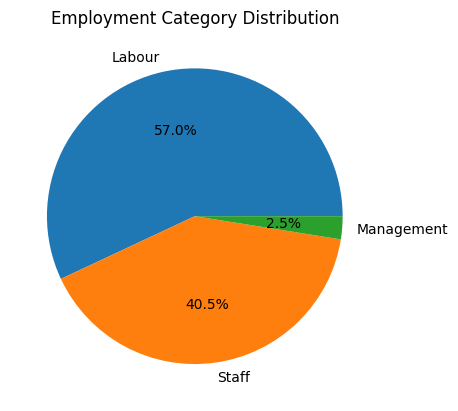

In [ ]:
#draw a pie chart for Employment_Category, also change the labels as 0-Labour, 1-Staff, 2- management in the garph

import matplotlib.pyplot as plt
# Create a dictionary to map the numerical values of Employment_Category to their corresponding string labels
employment_category_mapping = {
    0: 'Labour',
    1: 'Staff',
    2: 'Management'
}

# Use the mapping dictionary to replace the numerical values in the employees DataFrame
employees['Employment_Category'] = employees['Employment_Category'].map(employment_category_mapping)

# Calculate the number of employees in each Employment_Category
employment_category_counts = employees['Employment_Category'].value_counts()

# Create a pie chart of the Employment_Category counts
plt.pie(employment_category_counts, labels=employment_category_counts.index, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Employment Category Distribution')

# Show the pie chart
plt.show()


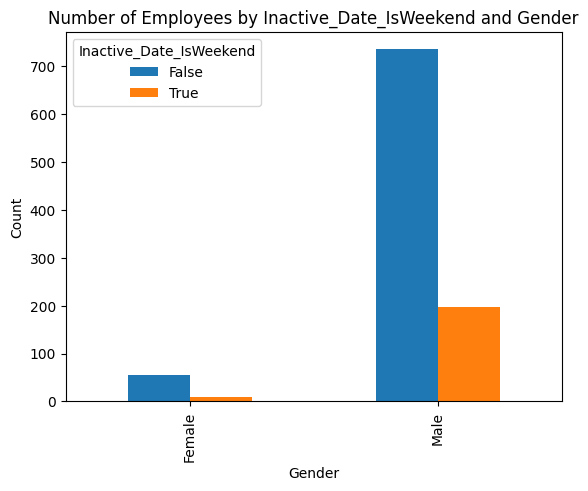

In [ ]:
# prompt: Draw a  bar graph for Inactive_Date_IsWeekend grouped by gender

import matplotlib.pyplot as plt
# Create a bar chart of the Inactive_Date_IsWeekend grouped by Gender
employees.groupby(['Gender', 'Inactive_Date_IsWeekend']).size().unstack().plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Employees by Inactive_Date_IsWeekend and Gender')

# Show the plot
plt.show()


**Hypotheses**